We will be doing a LinearRegression House SalesPrice Prediction based on number of bedrooms, bathrooms and square footage


First we import the necessary libraries that will be essential in implementing the LinearRegression Model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

We will use the Panda library to read the csv file format and also split the data to the input parameters and the output result. after that we can see visually how our data looks like.

array([[<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>],
       [<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

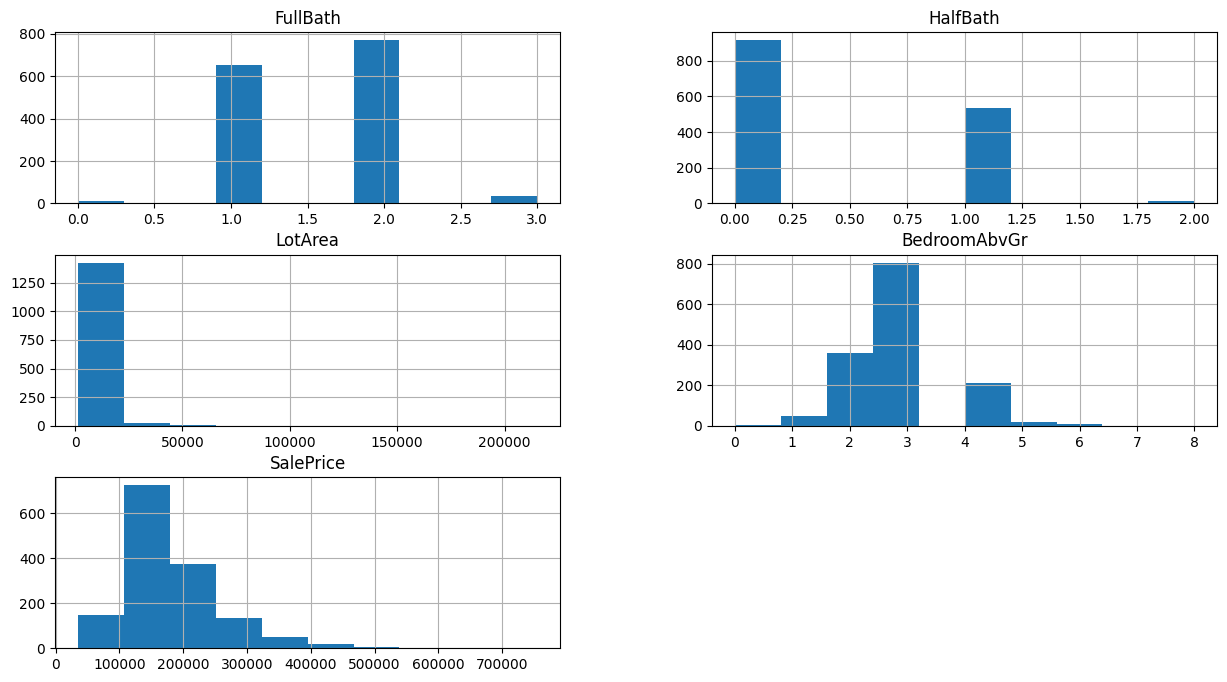

In [3]:
train_data = pd.read_csv("train.csv")
X = train_data[["FullBath","HalfBath","LotArea","BedroomAbvGr"]]
Y = train_data["SalePrice"]
train_data = X.join(Y)
train_data.hist(figsize=(15,8))

We can also see the correlation of each parameters to better understand which independent variables affect's the dependent varibale i.e SalesPrice mor than other other parameters 

<Axes: >

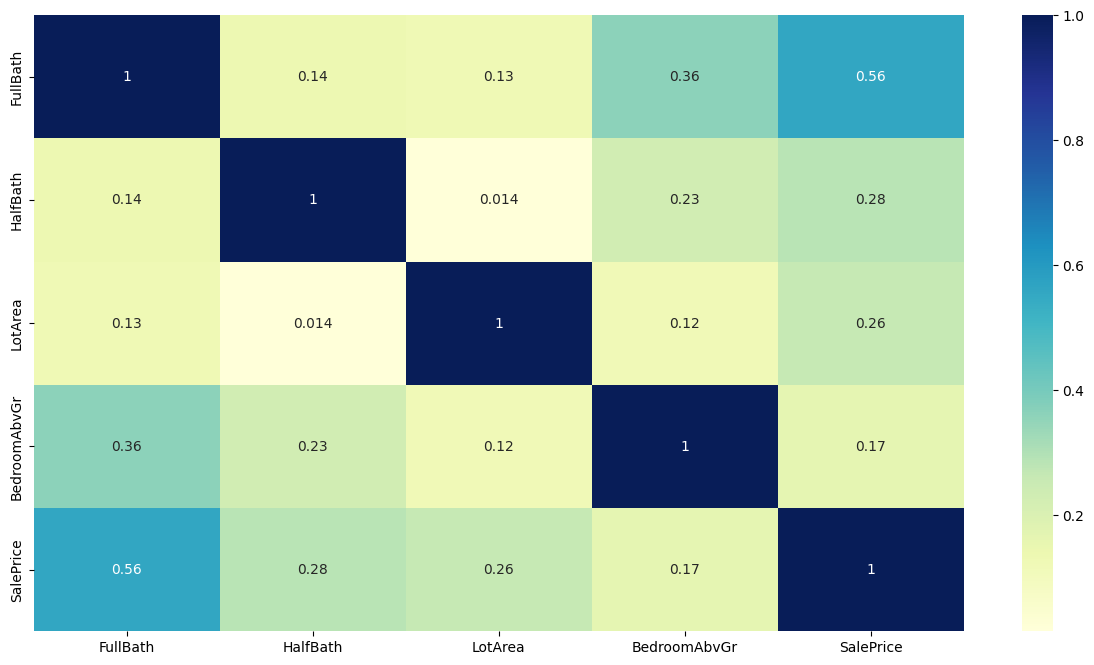

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

We then can train our LinearRegression Model with the data we have extracted. using the fit method.

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

Finally, we can let our model predict the House Sales Price of a new data based on the data it was trained on.

In [6]:
test_data = pd.read_csv("test.csv")
x_test = test_data[["FullBath","HalfBath","LotArea","BedroomAbvGr"]]
predict = reg.predict(x_test)

Inorder to see the output as csv file format we can run the block of code below.

In [8]:
import csv
def array_to_csv(array, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(array)
submission = [["id","SalesPrice"]]
for i,price in enumerate(predict):
    submission.append([str(i+1461),price])
array_to_csv(submission, 'Result.csv')